## 자르기 (Crop)
이미지에서 텍스트가 포함된 영역만 찾아 자르기 위함

### Import Packages

In [8]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

In [1]:
def plt_imshow(img=None, title='image', figsize=(8, 5)):
    '''
    :param img: (numpy) or (list - numpy)
    :param title: (str) or (list - str)
    :param figsize: (tuple)
    :return: None
    '''
    plt.figure(figsize=figsize)

    if type(img) == list:
        if type(title) == list:
            titles = title
        else:
            titles = []

            for i in range(len(img)):
                titles.append(title)

        for i in range(len(img)):
            if len(img[i].shape) <= 2:
                try:
                    rgbImg = cv2.cvtColor(img[i], cv2.COLOR_GRAY2RGB)
                except:
                    rgbImg = img[i]
            else:
                try:
                    rgbImg = cv2.cvtColor(img[i], cv2.COLOR_BGR2RGB)
                except:
                    rgbImg = img[i]

            plt.subplot(1, len(img), i + 1), plt.imshow(rgbImg)
            plt.title(titles[i])
            plt.xticks([]), plt.yticks([])

        plt.show()
    else:
        if len(img.shape) < 3:
            try:
                rgbImg = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
            except:
                rgbImg = img
        else:
            try:
                rgbImg = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            except:
                rgbImg = img

        plt.imshow(rgbImg)
        plt.title(title)
        plt.xticks([]), plt.yticks([])
        plt.show()

### Load Image

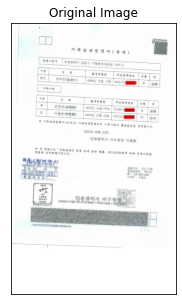

In [3]:
img_path = '../test_image/test_image1.jpg'
img = cv2.imread(img_path)

plt_imshow([img], ['Original Image'])

### GaussianBlur & GrayScale

In [31]:
blur_img = cv2.GaussianBlur(img, (5, 5), 0)

In [33]:
if len(img.shape) < 3:
    gray_img = blur_img
else:
    gray_img = cv2.cvtColor(blur_img, cv2.COLOR_BGR2GRAY)

### Find Points

In [35]:
threshold1 = 100
threshold2 = 100

edges = cv2.Canny(gray_img, threshold1, threshold2)
contours, _ = cv2.findContours(edges, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

points = []

for h, cnt in enumerate(contours):
    area = cv2.contourArea(cnt)
    if area >= 90:
        for p in cnt:
            points.append(p[0])

points = np.array(points)

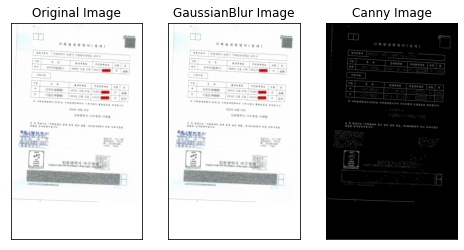

In [38]:
plt_imshow([img, blur_img, edges], ['Original Image', 'GaussianBlur Image', 'Canny Image'])

### Crop

In [46]:
if len(points) > 0:
    if points.size > 10:
        rect = cv2.minAreaRect(points)
        angle = abs(rect[2])
        box = cv2.boxPoints(rect)
        box = np.int0(box)
        x, y, w, h = cv2.boundingRect(box)
        
        debug_img = cv2.rectangle(img.copy(), (x, y), (x + w, y + h), (255, 0, 0), 2)
        crop_img = img[y:y + h, x:x + w]

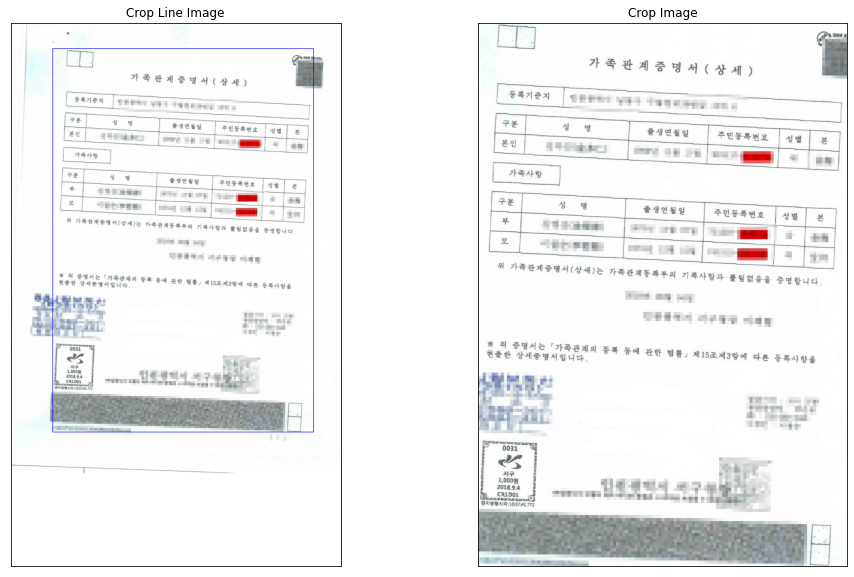

In [49]:
plt_imshow([debug_img, crop_img], ['Crop Line Image', 'Crop Image'], figsize=(16,10))